In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()

import sklearn.cluster as cluster
from sklearn.cluster import KMeans

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

### Data loading

In [6]:
data = np.load(r'E:\Python\Machine Learning\datasets\clusterable_data.npy')

In [18]:
data.T

array([[-0.12153499, -0.22093687,  0.1259037 , ...,  0.50243143,
         0.53822256, -0.08688887],
       [-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
         0.19412199, -0.2092721 ]])

In [19]:
data.shape

(2309, 2)

In [9]:
data.T[1].shape

(2309,)

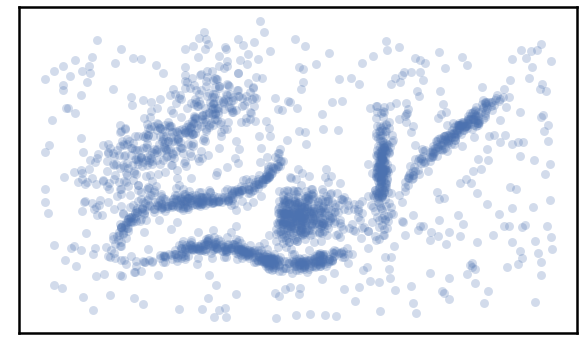

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)


frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

### Testing Clustering Algorithms

In real use cases we can’t look at the data and realise points are not really in a cluster; we have to take the clustering algorithm at its word.

In [7]:
# *args for variable number of arguments 
def myFun(*argv):  
    for arg in argv:  
        print (arg) 
    
myFun('1st Argument', '2nd Argument', '3rd Argument', '4th Argument') 

1st Argument
2nd Argument
3rd Argument
4th Argument


In [8]:
# *args with first extra argument 
def myFun(arg1, *argv): 
    print ("First argument :", arg1) 
    
    for arg in argv: 
        print("Next argument through *argv :", arg) 
  
myFun('1st Argument', '2nd Argument', '3rd Argument', '4th Argument') 

First argument : 1st Argument
Next argument through *argv : 2nd Argument
Next argument through *argv : 3rd Argument
Next argument through *argv : 4th Argument


In [9]:
# Example for usage of **kwargs:
# *kargs for variable number of keyword arguments 
  
def myFun(**kwargs):  
    for key, value in kwargs.items(): 
        print ("%s = %s" %(key, value)) 
  
# Driver code 
myFun(key1 = 'Data', key2 = 'science', key3 = 'learner')   

key1 = Data
key2 = science
key3 = learner


In [10]:
def myFun(arg1, **kwargs):  
    print(arg1)
    for key, value in kwargs.items(): 
        print ("%s == %s" %(key, value)) 

# Driver code 
myFun('Hello', key1 = 'Data', key2 = 'science', key3 = 'learner')   
        

Hello
key1 == Data
key2 == science
key3 == learner


In [11]:
# Using *args and **kwargs to call a function

def myFun(arg1, arg2, arg3): 
    print("arg1:", arg1) 
    print("arg2:", arg2) 
    print("arg3:", arg3) 
      
# Now we can use *args or **kwargs to 
# pass arguments to this function :  
args = ("Data", "Science", "Learner") 
myFun(*args) 
  
kwargs = {"arg1" : "Data", "arg2" : "Science", "arg3" : "Learner"} 
myFun(**kwargs) 

arg1: Data
arg2: Science
arg3: Learner
arg1: Data
arg2: Science
arg3: Learner


[4 4 4 ... 5 2 4]


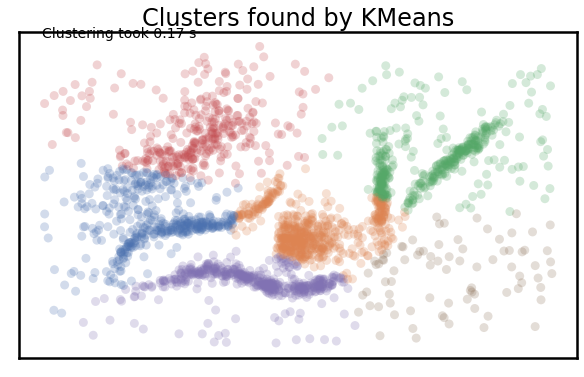

In [24]:
# first argument : data
# 2nd   argument : name of the algorithm
# 
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    
    labels     = algorithm(*args, **kwds).fit_predict(data)
    
    end_time   = time.time()
    
    print(labels)
    
    plt.figure(figsize=(10,6))
    palette    = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors     = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    
plot_clusters(data, KMeans, (), {'n_clusters': 6})

[2 0 2 ... 5 6 2]


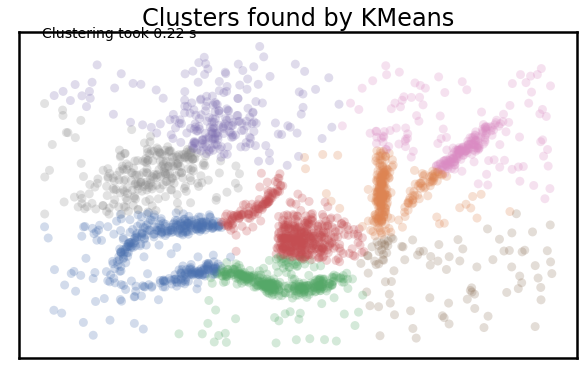

In [13]:
plot_clusters(data, KMeans, (), {})

### K-Means
K-Means is the ‘go-to’ clustering algorithm for many, simply because it is fast, easy to understand, and available everywhere. 

K-Means has a few problems however. 
- The first is that it isn’t a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn’t ‘find clusters’ it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. 
- That leads to the second problem: you need to specify exactly how many clusters you expect. 
- The usually proposed solution is to run K-Means for many different ‘number of clusters’ values and score each clustering with some ‘cluster goodness’ measure (usually a variation on intra-cluster vs inter-cluster distances) and attempt to find an ‘elbow’. 
- in practice finding that ELBOW is usually not so easy, nor does it necessarily correlate as well with the actual ‘natural’ number of clusters as you might like. 
- Finally K-Means is also dependent upon initialization; give it multiple different random starts and you can get multiple different clusterings. 

#### use our knowledge that there are 6 natural clusters and give that to K-Means.

[3 3 0 ... 0 2 3]


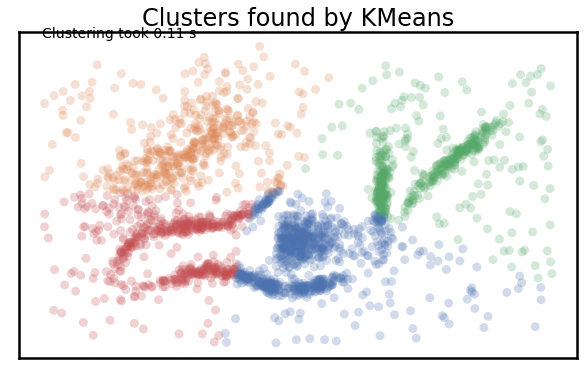

In [14]:
plot_clusters(data, KMeans, (), {'n_clusters': 4})

#### K-MEANS observation
- First, the assumption of perfectly globular clusters means that the natural clusters have been spliced and clumped into various more globular shapes. 
- Worse, the noise points get lumped into clusters as well: 
- Having noise pollute your clusters like this is particularly bad in an EDA world since they can easily mislead your intuition and understanding of the data. 



#### DBSCAN
- DBSCAN is a density based algorithm – it assumes clusters for dense regions. 
- it doesn’t require that every point be assigned to a cluster and hence doesn’t partition the data, but instead extracts the ‘dense’ clusters and leaves sparse background classified as ‘noise’. 
- In practice DBSCAN is related to agglomerative clustering. 

So, in summary:

- Clusters don’t need to be globular, and won’t have noise lumped in; varying density clusters may cause problems, but that is more in the form of insufficient detail rather than explicitly wrong. DBSCAN is the first clustering algorithm we’ve looked at that actually meets the ‘Don’t be wrong!’ requirement.

- Intuitive parameters: Epsilon is a distance value, so you can survey the distribution of distances in your dataset to attempt to get an idea of where it should lie. In practice, however, this isn’t an especially intuitive parameter, nor is it easy to get right.

- Performance: This is DBSCAN’s other great strength; few clustering algorithms can tackle datasets as large as DBSCAN can.

In [23]:
import sklearn.cluster as cluster

In [21]:
cluster.DBSCAN()

DBSCAN()

[ 0  0  0 ... -1 -1  0]


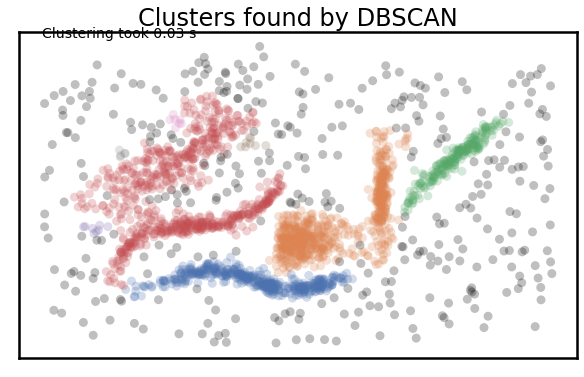

In [25]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

#### HDBSCAN
- HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. 
- The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. 
- Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points ‘falling out of a cluster’. This results in a smaller tree with fewer clusters that ‘lose points’. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability. 
- The immediate advantage of this is that we can have varying density clusters; 
- the second benefit is that we have eliminated the epsilon parameter as we no longer need it to choose a cut of the dendrogram. 
- Instead we have a new parameter min_cluster_size which is used to determine whether points are ‘falling out of a cluster’ or splitting to form two new clusters. 

In [18]:
import hdbscan

[ 5  5  5 ... -1 -1  5]


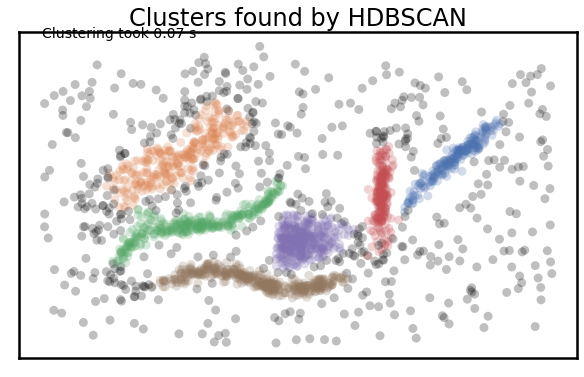

In [19]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

[ 5  5  5 ... -1 -1  5]


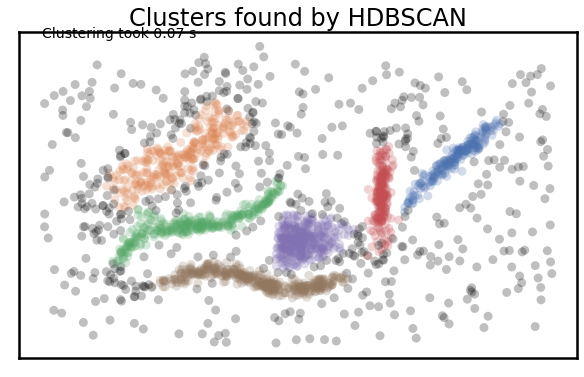

In [20]:
#!conda install -c conda-forge hdbscan
#!conda install hdbscan

plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})